# 회귀분석

Last updated 20201106FRI1100 20191213FRI1110

## S.1 목차

* S.2 문제의 이해
* S.3 회귀식
* S.3.1 모델
* S.3.2 변수
* S.3.3 입력변수의 수에 따른 구분
* S.3.4 표준화에 따른 구분
* S.4 OLS
* S.4.1 데이터
* S.4.2 그래프
* S.4.3 선형 회귀식 풀기
* S.4.4 Python으로 미분해서 풀어보자
* S.4.5 R2 (S.5.5 오류 계산하고 해서 모두 s.6 gradient 뒤로 이동)
* S.5 matrix inverse method
* S.5.1 풀기
* S.5.2 데이터
* S.5.3 identity matrix
* S.5.4 $\beta$
* 문제: Matrix Inverse Method 회귀모델
* S.5.5 오류 계산
* S.5.6 sympy matrix
* S.6 gradient for linear regression
* 문제: 회귀식 그래프 함수
* 문제: 키 몸무게를 matrix inverse method와 gradient descent로 풀기
* S.7 정규화 회귀모형
* 문제 UCI Abalone
* S.8 Local Regression
* S.9 Ridge
* S.10 Lasso
* S.11 forward stagewise
* S.11 비선형 모델
* 문제: iris데이터를 numpy, statsmodels, sklearn, Pyspark로 회귀분석
* 문제: Pyspark로 매출 회귀분석 및 평가
* 문제: 주택가격의 sklearn (Lasso, Ridge), Pyspark로 회귀분석
* 문제: statsmodel, pyspark로 당뇨의 회귀분석 및 평가

* 참조 ISLR 6장

## S.2 문제의 이해

어떤 값을 예측한다고 하고, 그 값에 영향을 미치는 변수들이 있다고 하자.
예측 값을 **종속변수 Dependent variables** 또는 **출력변수 Output variables**라고 하고,
영향변수를 **독립변수 Input variables**라고 하거나 **입력변수 Input variables**라고 한다.
예를 들어, 영화매출을 예측한다고 하자. 매출에 영향을 미칠 수 있는 변수로 평점, 광고비, 투자비, 개봉일 매출액, 조회수 등을 꼽을 수 있다.
회귀분석은 입력변수로부터 목표 값을 예측을 하는 문제에 사용한다.

## S.3 회귀식

### S.3.1 모델

$y = \beta_0 + \beta_1x_1 + \ldots + \beta_nx_n
 = \beta_0 + \sum_{j=1}^n \beta_j x_j$

* $x \in \mathbb{R}^{m}_{n}$는 입력변수이고 i개 레코드, j개 속성으로 이루어진 입력데이터
* $y$ 는 목표변수로서 1개의 컬럼 값을 가진다.
    $$\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}$$

위 식은 $x_0=1$인 경우 $y = \sum_{j=0}^n \beta_j x_j$

#### 벡터 표기

데이터 x는 벡터로 표현할 수 있으며, $x^{m}_{n}$는 m개의 데이터 갯수, n개의 속성으로 구성된 벡터이다.
$x_{ij}$는 **i**번째 샘플(행)의 **j**번째 속성(열)이다.
또는 위첨자 superscript, 아래첨자 subscript를 이용하여 표기하기도 한다. $x^{(j)}_i$ 영어로 설명하면 이해하기 쉽다. 즉 위첨자 **Up**per는 알파벳 **U**로 시작하니 위에서 아래로 (**up**에서 down), 반면에 아래첨자 **L**ower는 왼쪽에서 오른쪽으로 (**l**eft to right) 구성된다 (Einstein 표기법이라 한다).
* 즉, 위첨자 superscript (j)는 j번째 **열**
* 아래첨자 subscript (i)는 i번째 **행**을 의미한다.


#### argmin

$\beta$를 w로 표기하기도 하는데, 그러면 회귀식은 y=wx으로 바꿔쓸 수 있다.
회귀식은 아래에서 보듯이 $\hat{w}$를 찾아야 풀리게 된다.
$argmin_{w}$은 오류 $(y-wx)^2$를 최소화하는 w를 의미한다.

$\hat{w} = argmin_{w} (y-wx)^2$



### S.3.2 입력변수의 수에 따른 구분

회귀식은 **입력변수에 대해 영향을 미치는 가중치를 주어 출력변수 값을 계산하는 식**이라고 할 수 있다.
출력변수는 숫자이고 입력변수는 하나 이상이 될 수 있다.

상관관계와 회귀분석은 여러 변수간의 관계를 분석하는 방법이란 공통점이 있다.
반면에 **상관관계**는 변수 간 관계의 강도를 -1 ~ 1 값으로 측정하는 것이고, **회귀분석**에서는 종속변수와 독립변수를 구분하여 설명하거나, 예측하는데 쓰인다.

입력변수에 따라 이진, 다중회귀분석으로 구분할 수 있다.
**이진회귀식 binary regression**은 두 변인 간의 관계를 나타내는 경우에 쓰인다.
**다중회귀식 multiple regression**은 변인이 복수인 경우를 말한다.

#### bias와 variance

**variance**는 회귀식을 기준으로 퍼져 있는 정도를 의미한다. 통계에서 말하는 분산으로, 오류가 넓게 퍼져 분포될 수록 variance는 크다.
반면에 **bias**는 회귀식이 평균적으로 벗어난 정도를 의미한다. 화살이 과녁에 도착하였지만, 여기 저기 퍼져 있는 것이 아니라 잘 모아져 있지만 실제 값에서 벗어난 정도를 말한다. bias가 크고 variance가 적으면 평균만 이동해주면 잘 맞게 된다.

변수가 증가할수록 **overfitting**의 위험이 발생할 수 있다. 즉 bias는 감소하지만, variance는 증가하게 된다.
예를 들어 변수의 갯수(p)가 데이터 수(n) 보다 많아지게 되면, variance가 무한대로 증가한다.
이럴 경우, **shrinkage** 방식으로 모델의 variance를 줄이고, 정확성을 높일 수 있다.

모든 변수를 넣어서 모델을 만들 수 있지만, 그 보다는 **변수를 추가하면서 그 조합에서 RSS, Residual Sum of Squares가 가장 적은 모델을 선택**하게 된다.
속성이 10개라면 1024개 모델, $2^{10}$의 조합이 가능하다. 속성이 40개 이상이면 $2^{40}$, 계산이 거의 불가능하다.

또는 변수를 하나씩 추가하면서 **stepwise**, 또는 순서를 정하지만, 먼저 넣어야할 변수와 아닌 경우로 계층화해서 (고기류는 먼저 넣고, 야채는 나중에) **hierachical** 방식으로 할 수 있다.
* forward selection: 후보변수 없이 null model에서 시작하여, 하나씩 후보변수를 추가 
* backward selection: 모든 후보변수를 넣고 full model에서 시작하고, 하나씩 제거

변수를 선택하는 기법으로 PCA (Principle Component Analysis)를 사용할 수 있다.

### S.3.4 표준화에 따른 구분

비표준화된 회귀식 unstandardized regression equation은 원래 데이터를 그대로 사용하기 때문에 직관적으로 이해할 수 있다.

$$ Y = a + b \times X $$

그러나 표준화된 standardized regression equation: 원시값(raw data)를 사용하는 것이 아니라 z값을 사용할 수 있다.

$$ z_y = a + b \times z_x $$

### S.3.5 general linear model

여러 변수로 구성된 선형적 관계의 모델을 말하는데, 이 때 오류 residuals가 **정규분포**를 따르는 경우를 말한다.
즉 general linear model은 결과 값이 정규분포일 경우, ANOVA, MANOVA, t-test, 선형회귀분석 등이 해당된다.
에러 $\epsilon_i \sim N(0,\sigma^2)$

$$ y_i = \beta_0 + \beta_1 x_{1i} + ... + \beta_p x_{pi} + \epsilon_i $$


> GLM 

> 일반화선형모델 (GLM: generalized linear model)은 입력변수와 예측변수를 선형관계로 모형화한다.
그러나 **오류 Residuals가 정규분포를 따르지 않는 경우**, 연결함수 link function을 통해 비정규화를 줄이려고 한다.
정규화가 아닌 분포는 여러 형태가 있을 수 있다. 이항 binomial, 포아손 Poisson, 베타 beta, 감마 gamma 등을 예를 들 수 있다.
종속변수가 이항분포인 경우 로지스틱을, 종속변수가 갯수인 경우 poisson으로 모델링한다.
generalized라는 단어는 선형, 로지스틱, 포아손을 **일반화 generalized**한 모델이라 그렇게 명명되었다.


위키피디아 예제: http://en.wikipedia.org/wiki/Simple_linear_regression

$
\begin{align}
\hat{a} &= \frac{nS_{xy}-S_xS_y}{nS_{xx}-S_x^2} = 61.272 \\
\hat{b} &= \frac{1}{n}S_y - \hat{a} \frac{1}{n}S_x = -39.062
\end{align}
$

## S.4 OLS 계산

회귀식은 입력데이터 간의 관계를 나타내고, 그 관계로 인해 발생하는 오류를 최소화하도록 만들어진다.
오류는 **y실제 - $\hat{y}$예측 차이의 제곱**을 합계낸 값으로, 이를 **최소화**하는 지수를 구하면 최적식을 구할 수 있다.
$y-\hat{y}$은 음수가 나올 수도 있으므로 오류의 합계를 구하려면 제곱을 한다.
즉 OLS (Ordinary Least Square)는 오류를 최소화하여, 회귀식을 찾는 방법이다.


### S.4.1 데이터

x,y 데이터를 생성해보자.

x | y
-----|-----
1 | 6
2 | 5
3 | 7
4 | 10

In [1]:
import numpy as np

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

### S.4.2 그래프

```scatter(x,y)```로 각 좌표(x,y)를 나타내보자.
```subplot()```에는 3개의 인자가 사용된다 - 행, 열, 순서 (왼쪽 상단 1부터 시작해서 오른쪽으로 이동). 즉 **211은 2행 1열의 첫째**, **212는 2행 1열의 둘째**를 의미한다.

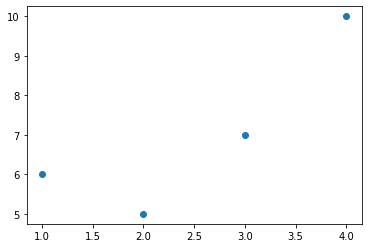

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)

### S.4.3 선형 회귀식 풀기

x, y 값을 하나씩 입력하면, 아래 식이 성립한다.

$6 = \beta_0 + \beta_1 \times 1$

$5 = \beta_0 + \beta_1 \times 2$

$7 = \beta_0 + \beta_1 \times 3$

$10 = \beta_0 + \beta_1 \times 4$


실제와 예측의 차이인 **오류 $(y-yhat)^2$를 최소화**하는 베타 값을 구해보자.

$(6 - (\beta_0 + \beta_1 \times 1))^2$

$(5 - (\beta_0 + \beta_1 \times 2))^2$

$(7 - (\beta_0 + \beta_1  \times 3))^2$

$(10 - (\beta_0 + \beta_1  \times 4))^2$

위 식을 모두 더해서 총오류를 구하면:

$f=210 + 4\beta_0^2 + 30\beta_1^2 + 20\beta_0\beta_1 - 56\beta_0 - 154\beta_1$

위를 편미분하면:

$\frac{\partial f}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56$

$\frac{\partial f}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154$

이를 풀면:

$\beta_0 = 3.5$

$\beta_1 = 1.4$

예측 값 $\hat{y}$를 계산해보자.

각 x 값에 기울기 1.4를 곱하고, y절편 3.5를 더해서 구할 수 있다.

$yhat=3.5 + 1.4 x$

x는 벡터 값으로 요소별 '$x \times 1.4 + 3.5$'와 같이 덧셈, 곱셈이 가능하다.

In [3]:
yhat=x*1.4+3.5

Python3의 출력기능이 있는 f를 사용하여 출력해보자.

In [4]:
f"predicted: {yhat}"

'predicted: [4.9 6.3 7.7 9.1]'

실제값과 예측값의 오류를 구해보자

In [5]:
f"predicted - actual: {yhat-y}"

'predicted - actual: [-1.1  1.3  0.7 -0.9]'

오류는 플러스, 마이너스 서로 상쇄될 수 있다. 오류의 제곱, 즉 RSS를 구하면 크기를 올바르게 알 수 있다.

In [7]:
f"error: {np.sum(np.power(yhat-y,2))}"

'error: 4.199999999999998'

### S.4.4 Python으로 미분해서 풀어보자

편미분 partial derivatives은 변수 가운데 하나를 선정하고 나머지는 상수로 보고 미분하는 것이다.
예를 들어, 

$
f(x,y) = x^2 + xy + y^2\\
\frac{\partial{f}}{\partial{x}} = 2x + y
$

SymPy는 수식이나 논리명제를 풀기위해 만들어진 Python 라이브러리이다.
Anaconda에는 이미 설치가 되어 있다. 설치가 필요하면 ```pip3 install sympy```라고 하면 된다.
sympy를 import 해서, sp로 사용해보자.

In [6]:
import sympy as sp

```symbols('b0,b1')```는 따옴표 안의 b0,b1을 변수로 선언한다.

In [7]:
b0,b1=sp.symbols('b0 b1')

앞서 구한 총오류 f함수를 b0, b1에 대해 미분을 해보자.

In [9]:
f=210 + 4*b0**2 + 30*b1**2 + 20*b0*b1 - 56*b0 - 154*b1

diff(f,b0)는 f함수를 b0에 대해서 미분하는 명령어이다.
diff(f,b1)는 f함수를 b1에 대해서 미분하는 명령어이다.

In [10]:
fdiff_b0=sp.diff(f,b0)
fdiff_b1=sp.diff(f,b1)

줄바꿈 ```\n```을 넣어서 출력하려면 f출력은 조금 복잡해진다.
"".format()으로 출력한다.

In [11]:
print ("fdiff with b0: {}\nfdiff with b1: {}".format(fdiff_b0, fdiff_b1))

fdiff with b0: 8*b0 + 20*b1 - 56
fdiff with b1: 20*b0 + 60*b1 - 154


위 식을 Sympy ```solve()```로 풀면 해를 구할 수 있다.
이 함수의:
* 첫째 인자는 수식이고, 0으로 놓고 풀게 된다.
즉 ```fdiff_b0 = 0, fdiff_b1 = 0```으로 하는 것과 동일하다.
* 그리고 두번째 인자로 넣은 b0, b1을 구하면 위에서 계산한 값과 동일한 결과가 나온다.

In [12]:
exp=sp.solve([fdiff_b0, fdiff_b1],[b0,b1])

In [13]:
print("exp={0}".format(exp))

exp={b0: 7/2, b1: 7/5}


### S.4.5 $R^2$

$R^2$는 **종속변수 dependent variable의 분산을 독립변수 independent variable(s)로 얼마나 예측**할 수 있는지를 나타낸다. 즉, 계산식 **총 오류TSS = 오류SSE +  잔여오류RSS**에서 **잔여오류RSS를 TSS총오류로 나누어** 계산한다.

$r^2=\frac{RSS}{TSS}$

* 총오류 TSS (Total Sum of Squared Errors)
* 오류의 합계 SSE (Sum of Squared Errors)
* 잔여 오류 RSS (Residual Sum of Squared Errors)

#### 데이터

x는 0~8의 정수로, y는 임의로 설정한다.

In [1]:
import numpy as np

x=np.arange(0,9)
y=np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])

numpy에서 해주었던 것과 같이 ```np.ones(9)``` 명령어로 1을 넣어서 절편을 구해준다.

In [2]:
A=np.array([x, np.ones(9)])

In [3]:
print (A)

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


numpy에서 행과 열을 읽을 경우 인덱스로, 모든 행 (열)은 ```:```로 표기한다.

**행**을 읽을 경우, 즉 ```i```행의 모든 열은 ```A[i,:]``` 또는 ```:```는 생략해서 ```A[i]```로 읽고

In [4]:
A[0,:]

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

**열**을 읽을 경우, 즉 모든 행 ```:```의 ```j```열은  A[:,j]로 읽는다.

In [5]:
A[:,1]

array([1., 1.])

**$x_{02}$ 또는 $x_{0}^{2}$**는 1번째 행(레코드), 3번째 컬럼(속성) A[0,2]로 읽는다.

In [6]:
A[0,2]

2.0

#### numpy listsq

numpy의 ```listsq()```를 사용하여, 데이터의 회귀식 계수 w0, w1을 계산해보자.
Python2에서는 ```np.linalg.lstsq(A.T, y)```, 그러나 ```np.linalg.lstsq(A.T, y, rcond=None)```라고 해준다.
```rcond```는 행렬 A의 특잇값 singular value의 cut-off 비율인데, 기본값을 적용하지 않겠다는 의미이다.

In [7]:
w0, w1=np.linalg.lstsq(A.T, y, rcond=None)[0]

In [8]:
print ("w0: {}\nw1: {}".format(w0, w1))

w0: 0.7166666666666672
w1: 19.188888888888897


예측 값을 구해보자. 실제 값과 얼마나 차이가 나는지 비교해보자.

In [9]:
yhat=w0*x+w1

In [10]:
print ("예측: {}".format(yhat))

예측: [19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


#### 그래프

예측 yhat과 실제 y의 그래프를 그려보자.
예측은 빨간 실선 (r-), 파란 점 (bo, 'b'는 blue, 'o'는 동그라미 점)으로 그린다.

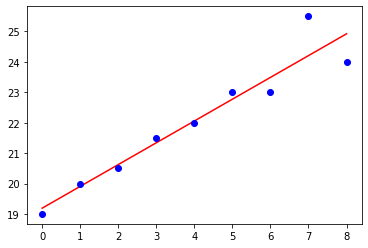

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,yhat,'r-',x,y,'bo')
plt.show()

#### R squared 계산

총오류와 잔여오류를 계산해보자.

In [12]:
RSS = sum((y-yhat)**2)
TSS = sum((y-np.mean(y))**2)

In [27]:
r_squared = 1 - (float(RSS))/TSS

In [28]:
f"r_squared: {r_squared}"

'r_squared: 0.9138385502471171'

adjusted R-squared는 독립변수의 개수에 따라 과도한 $R^2$를 수정한 값이다.

$R^2\space adjusted=1 - \frac{(1-R^2)(n-1)}{n-k-1}$

* n은 데이터 개수
* k는 독립변수 개수

In [29]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-A.shape[0]-1)   # 0.9015 without -1

In [30]:
f"adjusted_r_squared: {adjusted_r_squared}"

'adjusted_r_squared: 0.8851180669961561'

#### statsmodels R squared
statsmodels을 사용해서 회귀분석과 $R^2$를 알아보자.

In [31]:
import statsmodels.api as sm

In [32]:
result = sm.OLS(y, A.T).fit()

측정 값이 불과 9로 적어서 UserWarning이 뜬다.

In [33]:
result.summary()

/home/jsl/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     74.24
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           5.66e-05
Time:                        08:19:06   Log-Likelihood:                -7.6827
No. Observations:                   9   AIC:                             19.37
Df Residuals:                       7   BIC:                             19.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7167      0.083      8.616      0.000       0.520       0.913
const         19.1889      0.396     48.458      0.000      18.253      20.125
==============================================================================
Omnibus:                        4.624   Durbin-Watson:                   3.078
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                1.154
Skew:                           0.773   Prob(JB):                        0.561
Kurtosis:                       3.830   Cond. No.                         9.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
result.rsquared, result.rsquared_adj
# 0.877643371323 0.863248473832

(0.9138385502471168, 0.9015297717109907)

## S.5 matrix inverse method

### S.5.1 풀기

$\hat{w}$ 최소해를 구해보자.
오류 e는 잔차를 제곱해서 더한 합계 'sum of squared residuals' 이다.
따라서,
$f = e.T \times e = (y-wx)^T (y-wx) = y^Ty - 2w(x^Ty)^T+w^Tx^Twx$

위를 미분하면 $\frac{\partial f}{\partial w} =
    0 -2(x^Ty)+2wx^Tx$

위 미분 값을 0으로 놓고 풀면, $-2x^Ty + 2\hat{w}x^Tx = 0$

**위 식을 정리하면** $\hat{w} = (X^T X) ^{-1} X^T y$


### S.5.2 데이터

입력변수 x1, x2로부터 출력변수 y가 있다고 하자.

$2x_1 - 4x_2 = 8$

$3x_1 + 6x_2 = 9$

In [35]:
import numpy as np

y=[8,9]
x=[[2,-4],[3,6]]

In [37]:
f"x: {x} y: {y}"

'x: [[2, -4], [3, 6]] y: [8, 9]'

```set_printoptions(precision=2, suppress=True)```는 출력 자릿수를 2자리로 제한할 수 있다.

In [38]:
np.set_printoptions(precision=2, suppress=True)

In [42]:
xI = np.linalg.inv(x) 
print("x inv:\n{}".format(xI))

x inv:
[[ 0.25  0.17]
 [-0.12  0.08]]


### S.5.3 identity matrix

행열에 역행렬을 서로 곱하면 1, 즉 단위행렬 identity matrix가 된다.

In [46]:
print ("identity matrix 'x * xI':\n{}".format(np.dot(x,xI)))

identity matrix 'x * xI':
[[1. 0.]
 [0. 1.]]


identity matrix는 ```np.eye()```로 구할 수 있다.

In [47]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

행열 x에 역행렬 xI을 서로 곱해서 단위행렬 identity matrix와 비교하면 True가 된다.

In [48]:
np.eye(2) == np.dot(x,xI)

array([[ True,  True],
       [ True,  True]])

### S.5.4 $\beta$

위 식을 행렬로 나타내면,
$\beta \times x = y$

양변에 $x^{-1}$를 곱하면 아래 식이 된다.

$x^{-1}\times x\times \beta=x^{-1}\times y$

inverse에 원래의 벡터를 곱하면 identity matrix가 된다.

즉 $x^{-1}\times x=1$이므로

아래와 같이 $\beta$를 구할 수 있다.

$\beta=x^{-1}\times y$

#### inverse 계산

**$xx^{-1}=I$**인 $x^{-1}$가 존재하면 x는 invertible이라고 한다.


```np.array()```는 ```np.linalg.inv()```, ```np.mat()```는 ```x.I```로 inverse를 계산한다.

In [43]:
# matrix inverse
v=np.array([[2,3],[4,5]])
vI=np.linalg.inv(v)

In [44]:
print ("v=\n{0}\nv.I=\n{1}".format(v,vI)) #([[-2.5, 1.5], [ 2. , -1. ]])

v=
[[2 3]
 [4 5]]
v.I=
[[-2.5  1.5]
 [ 2.  -1. ]]


inverse를 산식으로 계산하면 다음과 같다. 앞서 계산과 동일하다.
$\frac{1}{ad-bc} \begin{pmatrix}d & -b\\-c & a\end{pmatrix}$

In [55]:
left=1./(2*5-3*4)
right=np.array([5,-3,-4,2])
f"{left*right}" #([-2.5,  1.5,  2. , -1. ])

'[-2.5  1.5  2.  -1. ]'

#### inverse로 $\beta$ 계산

matrix inverse method를 풀어보자.
numpy array로 행렬을 선언하고,
다음 식을 ```np.dot()```, ```np.linalg.inv()``` 함수를 이용해서 풀면 x1, x2를 구할 수 있다.


* $y = \beta x$인 경우, 양변을 $x^{-1}$로 곱하면
* $x^{-1}y = \beta x^{-1}x$ 여기서 $xx^{-1}=1$이므로 
* $\beta=x^{-1}\times y$

$
2 \times w1 - 4 \times w2 = 8\\
3 \times w2 + 6 \times w2 = 9
$

In [56]:
import numpy as np

x=np.array([[2,-4],[3,6]])
y=np.array([8,9])

In [57]:
xI=np.linalg.inv(x)

In [58]:
w1,w2=np.dot(xI,y)
print(w1,w2)

3.5 -0.25


위에서 구한 값을 대입해서 식을 풀어보자.
주어진 데이터로 풀어서 얻은 w1, w2를 넣어서 구한 값은 8, 9이다.
오류가 전혀 없이 실제 값이 구해진다.

In [64]:
f"{2*w1+(-4)*w2}"

'8.0'

In [65]:
f"{3*w1+6*w2}"

'9.0'

### numpy solve

```numpy.linalg.solve()```는 선형 벡터 식을 풀 수 있다

위의 x,y를 넣으면 값을 구할 수 있다.

In [66]:
np.linalg.solve(x,y)

array([ 3.5 , -0.25])

## 문제: Matrix Inverse Method 회귀모델

x: 1,2,3,4
y: 6,5,7,10의 경우 회귀식을 도출해 보자.
답은 y=3.0 + 1.7x

### 데이터

주어진 x, y에서 numpy array를 생성한다.

In [1]:
import numpy as np

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

절편을 구하기 위해 '1'을 추가한다.
즉 x0, x1으로 구성하고, 해당하는 w0, w1을 계산한다.

식을 y = wx로 다시 쓸 수 있다.

$6 = \beta_0 + \beta_1 \times 1$

$5 = \beta_0 + \beta_1 \times 2$

$7 = \beta_0 + \beta_1 \times 3$

$10 = \beta_0 + \beta_1 \times 4$


주의할 점은 x를 [x 1]로 변환한다는 점이다. 절편 값을 구하기 위해서 그렇게 해야 한다.

아래 데이터는 w1, w0을 각 행으로 구성하고 있다.

```python
[ 1.  1.]
[ 2.  1.]
[ 3.  1.]
[ 4.  1.]
```

$6 = \beta_1 \times 1 + \beta_0 \times 1$

$5 = \beta_1 \times 2 + \beta_0 \times 1$

$7 = \beta_1 \times 3 + \beta_0 \times 1$

$10 = \beta_1 \times 4 + \beta_0 \times 1$

원래의 데이터가 x는 행 2, 열 4로 구성되어서, transpose하면 4,2로 변환된다.

> 1차원 Transpose

> 1차원의 ```x.T*x```를 구해보자.
numpy array **1d**는 ```[...,...,...]``` 형식으로 구성된다.
**1d는 transpose를 해도 1d로 변환이 되지 않는다**.
이럴 경우 ```[[],[]]```로 만들어 trasnpose해야 한다.
np.newaxis 명령어로 ```[]```를 추가해서 ```[[],[]]```으로 변환해준다.
```python
x=np.array([1,2,3,4])
x[:, np.newaxis]
```
그 결과 [1,2,3,4]가 ([[1],[2],[3],[4]])로 변환이 된다.

In [2]:
x=np.array([x, np.ones(len(x))])
x=x.T

In [3]:
print(x)

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]


### 항목별 계산

$\hat{w} = (X^T X) ^{-1} X^T y$ 식의 우측을 한 항목씩 계산해 나가보자.

#### 1) $X^T X$ 계산

이 항목을 계산할 경우, 행렬의 shape에 주의해야 한다.
현재 x는 (4,2) x.T는 (2,4)이다.

In [5]:
f"x shape: {x.shape} xT shape:{x.T.shape}"

'x shape: (4, 2) xT shape:(2, 4)'

In [4]:
np.dot(x,x.T)

array([[ 2.,  3.,  4.,  5.],
       [ 3.,  5.,  7.,  9.],
       [ 4.,  7., 10., 13.],
       [ 5.,  9., 13., 17.]])

위는 대칭선을 기준으로 동일하다. ```np.linalg.inv(singular maxtrix)```는 오류가 난다.
자신에게 자신의 Transpose를 곱한 결과는 singular matrx이다.
이 의미는 가역행렬이 아니라는 의미이다. 즉 inverse를 할 수 없다.

In [7]:
np.linalg.inv(np.dot(x,x.T))

LinAlgError: Singular matrix

> **singular matrix**

> 위 결과는 singular matrix이다.
singlular matrix의 inverse()는 할 수 없다.
다음과 같은 singular matrices는 inv() 연산을 할 수 없다.
```python
np.linalg.inv(np.array([[3,5],[6,10]]))
```

> 앞서 역행렬은 $\frac{1}{ad-bc} \begin{pmatrix}d & -b\\-c & a\end{pmatrix}$ 이렇게 계산했는데, 좌변이 0이면 계산이 가능하지 못하다. 즉 역행렬을 구할 수 없다. 위에서 3 x 10 - 5 x 6 = 0이다. 따라서 위 행렬은 역행렬이다.
또한 1d matrix를 자신의 transpose로 곱하면 singular matrix가 된다.
**첫째 행의 2배, 3배, 4배로 행이 구성되어 실제 1행만이 독립적인 값을 가지고 있다**.

x (4,2), x.T (2,4)의 dot()을 구하면 (4,4) 행렬이 된다.
**순서를 바꾸면 x.T (2,4) x (4,2) -> (2,2)**가 된다.

In [18]:
xTx=np.dot(x.T,x)
print("xTx=",xTx)

('xTx=', array([[ 30.,  10.],
       [ 10.,   4.]]))


#### 2) $(X^T X) ^{-1}$ 계산

In [20]:
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

('xTxI=', array([[ 0.2, -0.5],
       [-0.5,  1.5]]))


#### 3) $X^T y$ 계산

In [21]:
xTyT=np.dot(x.T,y)
print("xTyT=",xTyT)

('xTyT=', array([ 77.,  28.]))


지금까지의 계산을 넣어서 weights를 구할 수 있게 된다.

#### 4) 전체 $(X^T X) ^{-1} X^T y$ 계산

In [22]:
print("weights=",np.dot(xTxI,xTyT))

('weights=', array([ 1.4,  3.5]))


### 한 줄로 계산

좀 복잡하지만, 한 줄로 줄여서 연산해도 된다.
x0이 뒤에 위치해 있으므로, w1, w0으로 저장한다.

In [12]:
w1, w0=np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

In [13]:
w0, w1

(3.499999999999993, 1.4000000000000021)

### numpy 최소자승법

데이터는 위 연습에서 사용했던 데이터를 그대로 사용하자.
앞서 가역행렬의 문제로 풀 수 없던 문제를 numpy 최소자승법으로 풀어보자.


```numpy.linalg.lstsq()```에는 컬럼벡터 x를 적어준다.
그 결과는 앞서 계산값과 일치한다.

함수의 입력을 적어준다.
* 독립변수 ```x```
* 종속변수 ```y```

그 반환 값은 가중치 weights이다. 독립변수 각 각에 대한 가중치이다.
$y=w_1\times x + w_0$ 순서대로 출력한다.

In [43]:
np.warnings.filterwarnings('ignore')   #suppress numpy warnings
print("numpy lstsq: ",np.linalg.lstsq(x,y))

('numpy lstsq: ', (array([ 1.40,  3.50]), array([ 4.20]), 2, array([ 5.78,  0.77])))


w0,w1는 위에서 풀었던 해와 동일하게 계산된다.


In [42]:
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
w1,w0=np.linalg.lstsq(x,y)[0]
print("w1=",w1,"\nw0=",w0)

('w1=', 1.4000000000000006, '\nw0=', 3.4999999999999978)


### 정리하면

회귀선을 numpy 최소자승법으로 구하고, 실제 데이터와 같이 그래프를 그려보자.

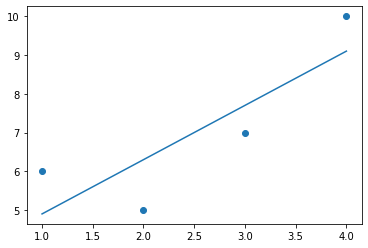

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# compute yhat from the model values of b0 and b1
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
_x=np.array([x,np.ones(len(x))])
_x=_x.T # shape (4,2)
#w1,w0=np.linalg.lstsq(_x,y)[0]
w1, w0=np.dot(np.linalg.inv(np.dot(_x.T, _x)), np.dot(_x.T, y)) #1.4 3.5
yhat=w0+w1*x
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)

## 문제: Matrix Inverse Method 회귀모델

데이터가 다음과 같이 주어졌을 때:
* x [1,2],[1,4],[1,6]
* y 3,6,7

회귀식을 도출해보자.
* 1) matrix inverse method로 $\hat{w}$을 계산,
* 2) 예측과 실제의 오류 합계를 계산,
* 2) 입력 데이터와 회귀선의 그래프를 작성한다.

## S.6 Gradient 알고리즘


### gradient란?
기울기 하강법 Gradient decent algorithm은 **오류를 점차 줄여가는 기울기를 선택하가면서 최적해**를 찾는다.

gradient는 경사도를 말한다.
처음에는 무작위 값에서 출발하여, 오류를 줄여가는 방향으로 경사도를 줄여가며 최적해를 찾아가는 방법이다.
경사방법 Gradient algorithm은 **greedy 탐욕알고리즘**으로, 경사도를 선택하여 답을 찾아가지만, 그 답이 최적이라는 보장은 없다.
오류함수가 2차함수인 경우 **local optimum**이 곧 global optimum이 된다.
탐욕적으로 계속 최적해를 구해나가야 한다.

OLS방법을 보편적으로 사용한다. 미분해서 풀 수 있지만, 변인의 갯수만큼 방정식을 풀어야 한다.
극대점을 찾기 위해서는 gradient 방향으로 오르는 것을 gradient ascent, 반대는 gradient descent(ascent)로 반복을 하면서 계수를 구한다.
(matrix 연산은 $n^{2.373}$이 소요된다는 연구)

### gradient ascent algorithms

최적해는 h(x)와 y가 최소화하도록, 가장 근사하게 예측할 수 있는 weights $\theta$를 추정한다.
* hypothesis
    * $h_{\theta}(x)=\sum_{i=0}^n(\theta^Tx)$

    * $h_{\theta}(x) = \theta_0 + \theta_1x_1 + \ldots + \theta_nx_n$ ($x_0=1$ 일 경우)

* cost function 오류는 가장 많이 쓰이는 **MSE Mean Squared Error**로 다음과 같이 나타낼수 있다.
예측과 실제의 차이를 서로 상쇄하지 않도록 제곱을 하고, 갯수로 나누어 평균
??을 구하는 식이다.
    * $J(\theta) = \frac{1}{2} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2$

참조: http://www.statisticsviews.com/details/feature/5722691/Getting-to-the-Bottom-of-Regression-with-Gradient-Descent.html

### gradient 계산

gradient는 그 점에서의 **기울기**로서 방향, 크기를 나타낸다.
벡터의 gradient는 '각 변수에 대한 f의 편미분 벡터'이다.

$\nabla f(x,y)= \frac{\partial{f}}{\partial{x}},
                  \frac{\partial{f}}{\partial{y}}$

$x_{n+1}=x_n-\gamma_n \nabla F(x_n),\ n \ge 0$이면
$F(x_0)\ge F(x_1)\ge F(x_2)\ge \cdots$이므로 결국 **최소값 local minimum**에 도달하게 된다.

예를 들어, $f(x,y) = x^2 + y^2$의 gradient를 구하면

$
\nabla f= \frac{\partial{f}}{\partial{x}},\
\frac{\partial{f}}{\partial{y}} = (2x,2y)
$

따라서 (1,1)에서 f값이 최대로 증가하는 방향은 (2,2)
그 기울기 (오류)는 $||(2,2)|| = \sqrt{2^2 + 2^2} = \sqrt{8}$

* 앞서 정의한
    * Hypothesis: $h_\theta(x) = \theta^T x$
    * Loss: $(h_\theta(x)-y)$
* 위 cost function에 대해 gradient를 구하면

$
\begin{align}
\frac{\partial}{\partial{\theta_j}}J(\theta)
    &=\frac{\partial}{\partial{\theta_j}} \frac{1}{2} (h_{\theta}(x) - y)^2\\
    &=2 \cdot \frac{1}{2} (h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (h_{\theta}(x) - y)\\
    &=(h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (\sum_{i=0}^n \theta_i x_i - y)\\
    &=(h_{\theta}(x) - y) x_j
\end{align}
$

위 식을 보면, **gradient는 오류에 x를 dot연산**해서 얻어진다.

오류에 상수항을 넣어서 계산해도 마찬가지이다.

* $J(\theta)$ $Error=\frac{1}{n} \sum_{i=1}^n(y_i - (ax_i+b))^2$

오류를 편미분해서 기울기 gradient를 a,b에 대해 구하면 다음과 같다. **$x_0=1$이면 당연히 위 식 하나로 a만 구하면 된다**.
* $\frac{\partial}{\partial{a}}
    =\frac{2}{n} \sum_{i=1}^n(y_i - (ax_i+b)) (-x_i)$
* $\frac{\partial}{\partial{b}}
    =\frac{2}{n} \sum_{i=1}^n(y_i - (ax_i+b)) (-1)$

### 갱신

$\alpha$는 학습비율 Learning Rate이며, 아래 값이 처음에는 큰 값으로 조정하다가, 반복이 계속될수록 적어지면서 0에 가까워질 때까지 현재 $\theta$를 갱신해 나간다.

$\theta_j := \theta_j - \alpha(h_\theta(x)-y)x_{j})$

$\theta_j := \theta_j - \alpha (y^{(i)}-h(x^{(i)}))x_j^{(i)}$

### batch, stochastic

* **batch gradient**, 학습데이터를 모두 일괄적으로 합계내어, 모델을 갱신함 (deterministic)
    * 반복:
        * $\theta$ $\forall i$
* **stochastic gradient descent** (incremental gradient descent) 데이터를 하나씩 사용하여, 모델을 갱신함. 따라서 결과가 batch와 다를 수 있슴.
    * 반복
        * for i in range(m):
            * $\theta$ 갱신 $\forall i$

### 의사코드

* 모든 계수 $\theta = 1$ (또는 무작위)
* 반복
    * $\theta$ 갱신
        * $\theta_j := \theta_j - \alpha \frac{\partial}{\partial{\theta_j}}J(\theta)$

실제와 예측의 차이인 **오류 $(y-yhat)^2$를 최소화**하는 베타 값을 구해보자.

$(6 - (\beta_0 + \beta_1 \times 1))^2$

$(5 - (\beta_0 + \beta_1 \times 2))^2$

$(7 - (\beta_0 + \beta_1  \times 3))^2$

$(10 - (\beta_0 + \beta_1  \times 4))^2$

위를 $\beta_0$에 대해 편미분하면:

$\frac{\partial f}{\partial \beta_0} = $

$2 \times (6 - \beta_0 - \beta_1 \times 1) \times (-1)$

$2 \times (5 - \beta_0 - \beta_1 \times 2) \times (-1)$

$2 \times (7 - \beta_0 - \beta_1 \times 3) \times (-1)$

$2 \times (10 - \beta_0 - \beta_1 \times 4) \times (-1)$

위 식을 풀어서 더하면

$ -12 + 2\beta_0 + 2\beta_1$

$- 10 + 2\beta_0 + 4\beta_1$

$ -14 + 2\beta_0 + 6\beta_1$

$ -20 + 2\beta_0 + 8\beta_1$

위 식을 모두 더해서 총오류를 구하면:

$8\beta_0 + 20\beta_1 - 56$

위를 $\beta_1$에 대해 편미분하면:

$\frac{\partial f}{\partial \beta_1} = $

$2 \times (6 - \beta_0 - \beta_1 \times 1) \times (-1)$

$2 \times (5 - \beta_0 - \beta_1 \times 2) \times (-2)$

$2 \times (7 - \beta_0 - \beta_1 \times 3) \times (-3)$

$2 \times (10 - \beta_0 - \beta_1 \times 4) \times (-4)$

위 식을 풀어서 더하면

$ -12 + 2\beta_0 + 2\beta_1$

$ -20 + 4\beta_0 + 8\beta_1$

$ -42 + 6\beta_0 + 18\beta_1$

$ -80 + 8\beta_0 + 32\beta_1$

위 식을 모두 더해서 총오류를 구하면:

$20\beta_0 + 60\beta_1 - 154$

위에서 구한 2개의 식은:

$\frac{\partial f}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56$

$\frac{\partial f}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154$

In [4]:
import sympy as sp
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
b0,b1=sp.symbols('b0 b1')
np.sum(-2 * (y-(b0+x.dot(b1))))

8*b0 + 20*b1 - 56

$\beta_0 = 1, \beta_1 = 1$ 이면
각각 -28, -74이다.

이 값을 대입해서, 새로운 bo, b1을 구하면:

* new b0 = 1 - 0.01 * (-28) = 1.28
* new b1 = 1 - 0.01 * (-74) = 1.74

## x, y

In [1]:
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
#x=np.array([0.5,2.3,2.9])
#y=np.array([1.4,1.9,3.2])

In [2]:
x=np.array([x,np.ones(len(x))])  # w0 * x0 + w1 * x1
x=x.T
print x, x.shape

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]] (4, 2)


## theta

우리가 구하려는 theta는 처음에 1로 설정한다.

In [3]:
theta=np.array(np.ones([x.shape[1]]))
print theta

[ 1.  1.]


## h(x)

In [4]:
print x*theta
print np.dot(x,theta)

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]]
[ 2.  3.  4.  5.]


함수로 만들어보자.

In [5]:
def h(x,theta):
    return np.dot(x,theta)

h(x,theta)

array([ 2.,  3.,  4.,  5.])

## gradient

### error

In [8]:
error=h(x,theta)-y
print error

[-4. -2. -3. -5.]


### gradient

```python
np.sum(y-h)*(-2)/len(x)의 결과는 -7
np.sum((y-h)*x)*(-2)/len(x) 결과는 -18.5
```

$x_0$은 1이므로 위는 ```np.dot(x.T,error)```로 바꿔쓸 수 있다.

아래 결과는 x 길이로 나누어주어서 그렇다.

In [9]:
print np.sum(y-h(x,theta))*(-2)/len(x)

-7.0


In [10]:
gradient=np.dot(x.T,error)
print gradient

[-37. -14.]


### update

기울기에 학습률을 곱하여 빼주면 theta를 갱신하게 된다.

In [11]:
alpha=0.01
theta -= alpha*gradient
print theta

[ 1.37  1.14]


In [12]:
#def gradientDescent(x, y, theta, alpha, m, numIterations):
alpha=0.01
numIterations=4000
theta=np.ones([x.shape[1]])
#theta=np.array([1,1])
for i in range(numIterations):
    h=np.dot(x,theta)
    error=h-y
    #gradient=[np.sum(y-h)*(-2), np.sum((y-h)*x)*(-2)]
    cost = np.sum((h-y)** 2) / (2 * len(x))
    gradient=np.dot(x.T,error) # w0, w1
    theta -= alpha*gradient
    if i%100 == 0:
        print "Iteration {0} | theta {1} Cost {2:.5f}".format(i, theta, cost)
#    return theta

Iteration 0 | theta [ 1.37  1.14] Cost 6.75000
Iteration 100 | theta [ 1.79291203  2.34479071] Cost 0.63779
Iteration 200 | theta [ 1.61550957  2.86637557] Cost 0.55893
Iteration 300 | theta [ 1.51820553  3.15246131] Cost 0.53521
Iteration 400 | theta [ 1.46483493  3.3093774 ] Cost 0.52807
Iteration 500 | theta [ 1.43556152  3.3954448 ] Cost 0.52592
Iteration 600 | theta [ 1.41950525  3.44265218] Cost 0.52528
Iteration 700 | theta [ 1.4106985   3.46854511] Cost 0.52508
Iteration 800 | theta [ 1.40586805  3.48274721] Cost 0.52503
Iteration 900 | theta [ 1.40321859  3.49053696] Cost 0.52501
Iteration 1000 | theta [ 1.40176537  3.49480959] Cost 0.52500
Iteration 1100 | theta [ 1.4009683   3.49715309] Cost 0.52500
Iteration 1200 | theta [ 1.4005311   3.49843849] Cost 0.52500
Iteration 1300 | theta [ 1.40029131  3.49914352] Cost 0.52500
Iteration 1400 | theta [ 1.40015978  3.49953023] Cost 0.52500
Iteration 1500 | theta [ 1.40008764  3.49974233] Cost 0.52500
Iteration 1600 | theta [ 1.40004

In [ ]:
def computeAvgError(a,b,x,y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (a + b * x[i])) ** 2
    return totalError / float(len(x))

a=1
b=1
alpha=0.01
n=len(x)
iter=1500
for j in range(iter):
    aGradient = 0
    bGradient = 0
    for i in range(n):
        #aGradient += (2./n) * (y[i] - ((a * x[i]) + b))*(-1)
        #bGradient += (2./n) * (y[i] - ((a * x[i]) + b))*(-x[i])
        aGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-1)
        bGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-x[i])
    a = a - (alpha * aGradient)
    b = b - (alpha * bGradient)
    if (j%100==0):
        print "iter:{0} a={1:.3f} b={2:.3f} AvgError={3:.3f}".format(j,a,b,computeAvgError(a,b,x,y))

#return a, b

리스트를 사용하면 벡터와 달리 반복문을 사용하는 것이 필요하다.

In [ ]:
import random

def computeAvgError(a,b,x,y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (a + b* x[i])) ** 2
    return totalError / float(len(x))

#x: attribute, 1d float array
#y: class, 1d int array
#alpha: learning rate
def GradientDescent(x,y,alpha,iter):
    a=random.random()
    b=random.random()
    alpha=0.01
    n=len(x)
    for j in range(iter):
        aGradient = 0
        bGradient = 0
        for i in range(n):
            #aGradient += (2./n) * (y[i] - ((a * x[i]) + b))*(-1)
            #bGradient += (2./n) * (y[i] - ((a * x[i]) + b))*(-x[i])
            aGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-1)
            bGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-x[i])
        a = a - (alpha * aGradient)
        b = b - (alpha * bGradient)
        if (j%100==0):
            print "iter:{0} a={1:.3f} b={2:.3f} AvgError={3:.3f}".format(j,a,b,computeAvgError(a,b,x,y))
    return a, b

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
a,b=GradientDescent(x,y,alpha,10000)
print "---> a={0}, b={1} after iterations".format(a,b)

yhat=a + b*x
print yhat